| Name     | ID   |
|----------|------|
| Zyad samy ramadan    | 19015720  |
| Ahmed Mahmoud Abdelhay Elemary     | 19015359  |
| Gamal Abdel Hameed Nasef Nowesar     | 19015550  |

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow  # For displaying images in Colab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# List the contents of your Google Drive root directory
drive_path = '/content/drive/My Drive/Images'
image_path = drive_path+'/CV_lab_1.png'
print(image_path)


/content/drive/My Drive/Images/CV_lab_1.png


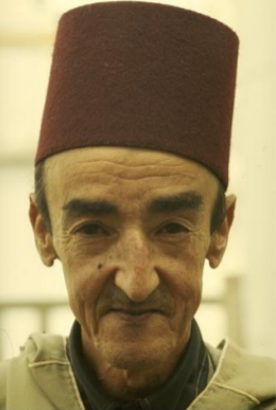

In [ ]:
image = cv2.imread(image_path)
cv2_imshow(image)


# 1.1.1 Noise Reduction Using **Median Filter**

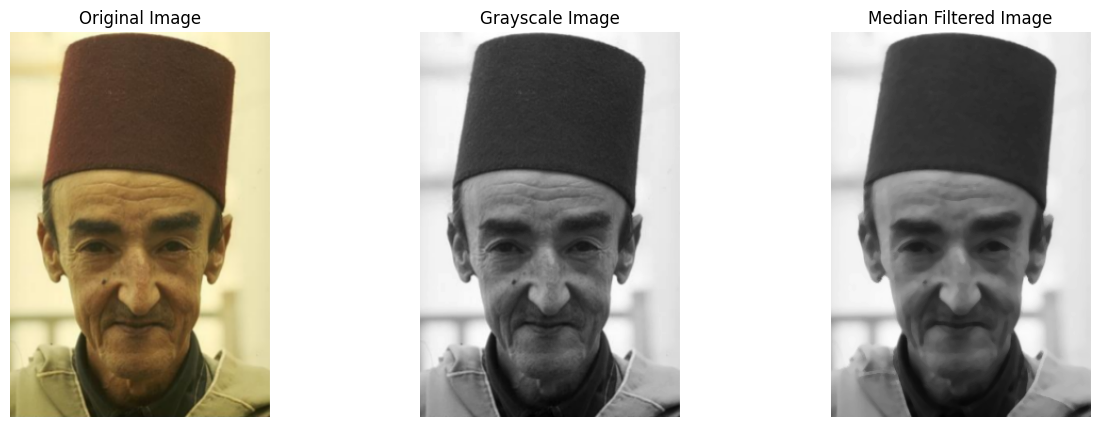

In [ ]:

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a median filter with a specified kernel size (e.g., 5x5) to the grayscale image
median_filtered_image = cv2.medianBlur(grayscale_image, ksize=5)

# Create a figure for displaying images side by side using Matplotlib
plt.figure(figsize=(15, 5))  # Set the figure size

# Original Image
plt.subplot(1, 3, 1)  # Create the first subplot in a 1x3 grid
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Display the original image in RGB format
plt.title("Original Image")  # Set the title for the subplot
plt.axis('off')  # Turn off the axis labels

# Grayscale Image
plt.subplot(1, 3, 2)  # Create the second subplot
plt.imshow(grayscale_image, cmap='gray')  # Display the grayscale image using a grayscale colormap
plt.title("Grayscale Image")
plt.axis('off')

# Filtered Image
plt.subplot(1, 3, 3)  # Create the third subplot
plt.imshow(median_filtered_image, cmap='gray')  # Display the median filtered image
plt.title("Median Filtered Image")
plt.axis('off')

plt.show()  # Show the figure with the three images


# 1.1.2 Edge Detection Using Laplacian Filter

(-0.5, 275.5, 409.5, -0.5)

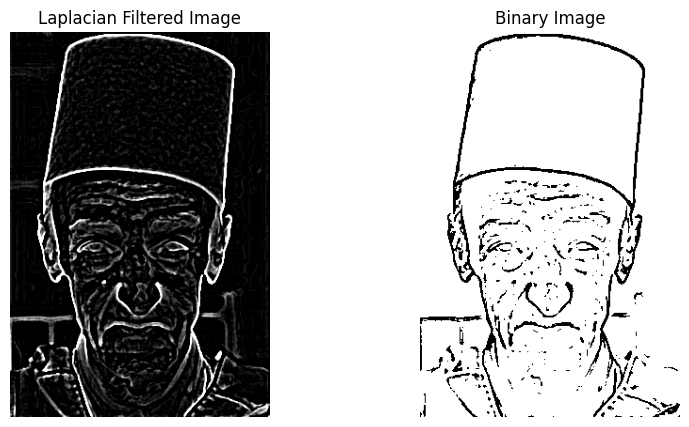

In [ ]:
# Apply Laplacian filter to the median filtered image with various optional parameters
laplacian_filtered_image = cv2.Laplacian(median_filtered_image, -1, scale=0.6, ksize=5)
# 'scale': Controls the sensitivity to edges, adjust for desired sharpness.
# 'ksize': The size of the Laplacian kernel, influencing edge detection.

# Apply a binary threshold to convert the Laplacian image into a black and white binary image
_, binary_threshold_image = cv2.threshold(laplacian_filtered_image, 90, 255, cv2.THRESH_BINARY_INV)
# 'thresh': Threshold value separating pixel classes (adjust for different binary effects).
# 'maxval': Maximum value assigned to pixels exceeding the threshold.
# 'type': Type of thresholding, cv2.THRESH_BINARY_INV creates an inverted binary image.

# Create a Matplotlib figure for displaying images side by side
plt.figure(figsize=(15, 5))  # Set the figure size

# Display the Laplacian filtered Image
plt.subplot(1, 3, 1)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title("Laplacian Filtered Image")
plt.axis('off')

# Display the binary thresholded image
plt.subplot(1, 3, 2)
plt.imshow(binary_threshold_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')


# 1.2 Generating a color painting and a cartoon


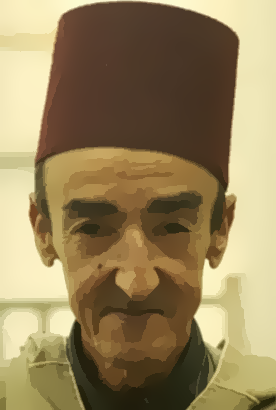

In [ ]:
# Apply bilateral filtering to the original image with specified parameters
bilateral_img = cv2.bilateralFilter(image, d=9, sigmaColor=10, sigmaSpace=7)
# - 'd': Diameter of each pixel neighborhood.
# - 'sigmaColor': Filter sigma in the color space.
# - 'sigmaSpace': Filter sigma in the coordinate space.

# Perform multiple iterations of bilateral filtering to enhance the image (30 iterations in this case)
for i in range(30):
    bilateral_img = cv2.bilateralFilter(bilateral_img, d=9, sigmaColor=10, sigmaSpace=7)
    # Repeated bilateral filtering helps in further noise reduction and smoothing.

# Display the final image after bilateral filtering
cv2_imshow(bilateral_img)

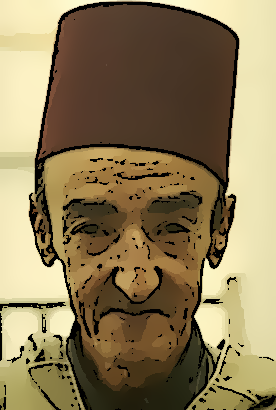

In [ ]:

# Define a function 'mask' that masks the input 'image' using a 'binary_image'
def mask(image, binary_image):
    x, y, _ = image.shape  # Get the dimensions of the input image
    for i in range(x):
        for j in range(y):
            if binary_image[i][j] == 0:  # If the corresponding pixel in the binary image is black (0)
                image[i][j] = 0  # Set the pixel in the input image to black (0)
    return image



cartoned_image = mask(bilateral_img,binary_threshold_image)

cv2_imshow(cartoned_image)